In [245]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import warnings
#warnings.filterwarnings('ignore')

In [246]:
df_data = pd.read_csv("us2022q2a.csv")
df_firms = pd.read_csv("usfirms2022.csv")


In [247]:
df_firms.rename(columns = {'Ticker':'firm'}, inplace = True)
df_merged = pd.merge(df_data, df_firms, on="firm", how="left")
df_merged['qdate'] = pd.PeriodIndex(df_merged['q'], freq="Q")
df_merged.set_index(['firm','qdate'],inplace=True)
df_merged.drop(columns=["Name","N","Class","Country\nof Origin",
                        "Type of Asset","Exchange / Src","Sector NAICS\nlast available","partind",'stockholderequity','Sector\nEconomatica'], inplace=True)

In [248]:
aux = df_merged['q'] == '2022q1'
aux
df = df_merged[aux]


In [249]:
df = df[df['Sector NAICS\nlevel 1'].isin(['Finance and Insurance', 'Real Estate and Rental and Leasing'])]

In [250]:
df['BookVal'] = df['totalassets'] - df['totalliabilities']
df['MarketVal'] = df['originalprice'] * df['sharesoutstanding']
df['ebit'] = df['revenue'] - df['cogs'] - df['sgae'] - df['otheropexp']
df['NetIncome'] = df['ebit'] - df['finexp'] - df['incometax'] + df['extraincome']

df['ProfMar'] = df['NetIncome'] / df['revenue']
df['EPS'] = df['NetIncome'] / df['sharesoutstanding']
df['EPSP'] = df['EPS'] / df['originalprice']

In [251]:

df['shrt_fin_lev'] = df['shortdebt'] / df['totalassets']
df['lng_fin_lev'] = df['longdebt'] / df['totalassets']
df['op_profit_mrgn'] = df['ebit'] / df['revenue']
df['R'] = np.log(df['adjprice']) - np.log(df['adjprice'].shift(4))

In [252]:
df.describe()

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,MarketVal,ebit,NetIncome,ProfMar,EPS,EPSP,shrt_fin_lev,lng_fin_lev,op_profit_mrgn,R
count,7.460000e+02,7.460000e+02,7.460000e+02,7.460000e+02,7.460000e+02,7.460000e+02,7.460000e+02,7.480000e+02,7.480000e+02,1.820000e+02,...,7.610000e+02,7.460000e+02,7.460000e+02,746.000000,745.000000,745.000000,182.000000,748.000000,745.000000,757.000000
mean,9.119072e+05,3.133992e+05,3.366513e+05,1.614837e+04,-5.589958e+04,8.030914e+03,3.319493e+04,4.391185e+07,3.873140e+07,8.895004e+05,...,9.481661e+06,2.457084e+05,1.485830e+05,NaN,0.866146,0.009333,0.068093,0.181348,-inf,0.006756
std,4.291789e+06,3.405313e+06,1.295260e+06,1.538297e+05,4.220885e+05,6.074566e+04,1.303064e+05,2.401848e+08,2.211812e+08,3.794054e+06,...,3.217756e+07,1.005476e+06,5.980922e+05,NaN,1.792575,0.095545,0.138864,0.232306,NaN,1.575494
min,-6.820000e+02,-1.100000e+04,-5.735160e+05,-7.950410e+05,-5.624000e+06,-1.053553e+06,-1.797860e+05,2.339234e+03,5.000000e+00,0.000000e+00,...,1.554325e+04,-5.544630e+05,-6.510000e+05,-inf,-4.430385,-1.864448,0.000000,0.000000,-inf,-5.300913
25%,2.865022e+04,0.000000e+00,0.000000e+00,0.000000e+00,-2.188175e+04,0.000000e+00,1.950000e+01,1.755401e+06,1.223579e+06,0.000000e+00,...,3.805496e+05,1.043492e+04,2.977849e+03,0.069168,0.138448,0.004697,0.000000,0.014548,0.147910,-0.962847
50%,1.013940e+05,6.485000e+02,3.816500e+03,0.000000e+00,-5.043000e+03,0.000000e+00,2.310000e+03,4.984920e+06,3.536338e+06,1.807950e+04,...,1.510027e+06,3.857750e+04,1.739250e+04,0.243367,0.514355,0.015556,0.009108,0.056035,0.517978,0.051601
75%,3.495750e+05,5.802750e+03,1.413708e+05,0.000000e+00,0.000000e+00,4.778000e+03,1.324850e+04,1.525270e+07,1.136569e+07,2.186235e+05,...,5.378227e+06,1.281018e+05,6.515350e+04,0.388899,0.999123,0.023996,0.050004,0.343164,0.927075,0.964230
max,8.014900e+07,7.319900e+07,1.504100e+07,3.006000e+06,2.829000e+06,4.330000e+05,1.781000e+06,3.954687e+09,3.668788e+09,4.471500e+07,...,4.798303e+08,1.387200e+07,8.282000e+06,inf,16.960636,1.030601,0.673480,1.382343,29.146628,5.627776


In [253]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) # de esta manera podemos quitar los infinitos causados por divisiones entre cero

In [254]:
df = df.dropna()

In [255]:
X = df[['shrt_fin_lev','lng_fin_lev','op_profit_mrgn','EPSP','R']]

## Matriz de correlacion

In [256]:
N = len(X)
uno = np.ones((len(X),1))
x1 = X.T @ X
x2 = X.T @ uno
x3 = (X.T @ uno).T
m = 1/N

corr_matrix = (x1 - m * (x2 @ x3)) / (N-1)
corr_matrix

,shrt_fin_lev,lng_fin_lev,op_profit_mrgn,EPSP,R
shrt_fin_lev,0.017706,-0.006849,0.309933,0.002933,-0.036655
lng_fin_lev,-0.006849,0.061297,1.183260,-0.000462,0.030355
op_profit_mrgn,0.309933,1.183260,4413.850466,0.167222,18.375951
EPSP,0.002933,-0.000462,0.167222,0.009295,0.020415
R,-0.036655,0.030355,18.375951,0.020415,3.322309


In [257]:
X.corr()

,shrt_fin_lev,lng_fin_lev,op_profit_mrgn,EPSP,R
shrt_fin_lev,1.000000,-0.207909,0.035059,0.228640,-0.151130
lng_fin_lev,-0.207909,1.000000,0.071937,-0.019351,0.067265
op_profit_mrgn,0.035059,0.071937,1.000000,0.026107,0.151747
EPSP,0.228640,-0.019351,0.026107,1.000000,0.116172
R,-0.151130,0.067265,0.151747,0.116172,1.000000


## Matriz de covarianza

In [258]:
#np.cov(df_new, bias = True)
X.cov()

,shrt_fin_lev,lng_fin_lev,op_profit_mrgn,EPSP,R
shrt_fin_lev,0.017706,-0.006849,0.309933,0.002933,-0.036655
lng_fin_lev,-0.006849,0.061297,1.183260,-0.000462,0.030355
op_profit_mrgn,0.309933,1.183260,4413.850466,0.167222,18.375951
EPSP,0.002933,-0.000462,0.167222,0.009295,0.020415
R,-0.036655,0.030355,18.375951,0.020415,3.322309


## Multicolinealidad 

In [259]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()

df_vif  = X[['shrt_fin_lev','lng_fin_lev','op_profit_mrgn']]

vif_data["feature"] = df_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]

print(vif_data)

          feature       VIF
0    shrt_fin_lev  1.031416
1     lng_fin_lev  1.031419
2  op_profit_mrgn  1.000004


'''
CONSIDERANDO 5 COMO NUMERO UMBRAL PARA DEFINIR SI ELIMINAMOS ALGUNA VARIABLE NOTAMOS QUE NO HAY NINGUNA VARIABLE INDEPENDIENTE QUE SUPERE
DICHO UMBRAL, POR LO TANTO PODEMOS ASEGURAR QUE NO HAY MULTICOLINEALIDAD, ES DECIR QUE NO HAY PARES DE VARIABLES INDEPENDIENTES CON UNA 
ALTA CORRELACIÓN
'''

In [260]:
x = X[['shrt_fin_lev','lng_fin_lev','op_profit_mrgn','EPSP']].to_numpy()
y = X['R'].values
x= np.transpose(x)


In [261]:
X.head()

,,shrt_fin_lev,lng_fin_lev,op_profit_mrgn,EPSP,R
firm,qdate,,,,,
AC,2022Q1,0.000000,0.000000,-1.280403,-0.017514,0.107853
ACT,2022Q1,0.024364,0.127927,0.826009,0.045438,-0.636304
ACTG,2022Q1,0.254991,0.003474,-0.629896,-0.349550,-2.518519
AEI,2022Q1,0.001657,0.001792,-0.846998,-0.124212,-3.490912
AFCG,2022Q1,0.000000,0.218182,0.623220,0.026921,1.410205


## Modelo con algebra matricial

In [262]:
import numpy as np

def determinar_b(X, Y):
    X = np.insert(X, 0, np.array((np.ones(len(X[0])))), 0).T
    return np.linalg.inv(X.T @ X) @ X.T @ Y
    
b = determinar_b(x, y)

for i in range (len(b)):
    print("b" + str(i) + ": "+str(b[i]))

print(b)



b0: 0.21221585780889612
b1: -2.5730568132607705
b2: 0.148916189433379
b3: 0.0041926102152258626
b4: 2.9401991827513974
[ 0.21221586 -2.57305681  0.14891619  0.00419261  2.94019918]


In [263]:
x_new = X[['shrt_fin_lev','lng_fin_lev','op_profit_mrgn','EPSP']].to_numpy()

In [264]:
intercept = b[0]
b = np.array(b)
'''
for i in range(len(x_new)):
    for j in range(len(x_new)):
        prod1 = b[j] * x_new[i][j]
'''
forecast=[]
for i in range(len(x_new)):
    pred = b[1]*x_new[i][1] + b[2]*x_new[i][2] + b[3]*x_new[i][3] + b[4]*x_new[i][4] + intercept
    forecast.append(float(pred))


IndexError: index 4 is out of bounds for axis 0 with size 4

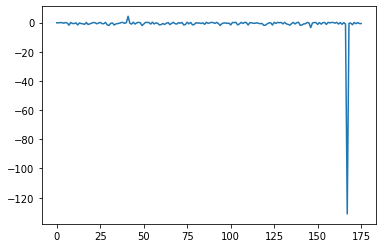

In [ ]:
import matplotlib.pyplot as plt
plt.plot(forecast)

In [ ]:
error = X['R'].values - forecast

In [ ]:
print("error promedio: " + str(error.mean()))

error promedio: 1.3997723871084384


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

x = sm.add_constant(X)

results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.459e+26
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:06:40   Log-Likelihood:                 4682.3
No. Observations:                 176   AIC:                            -9353.
Df Residuals:                     170   BIC:                            -9334.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.551e-17   8.18e-14      0.

In [ ]:
print(b)

[ 0.21221586 -2.57305681  0.14891619  0.00419261  2.94019918]
